In [89]:
import crowsetta
import hdf5storage
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import numpy as np

In [2]:
data_path = r'C:\Users\Sivan\Desktop\MSc\Cohen Lab\Data\lb4444_1_annotation_July_2019_Vika.mat'

### trying to use crowsetta

In [3]:
def create_syl_df_from_annot_file(file_path):
    scribe = crowsetta.Transcriber(format='yarden')
    audseq = scribe.from_file(file_path)
    records = []
    for annot in audseq:
        curr_path = str(annot.audio_path)
        prev_segment = None
        for segment in annot.seq.segments:
            time_from_prev = None
            if prev_segment:
                time_from_prev = segment.onset_s - prev_segment.offset_s
            records.append(
                {
                    'path': curr_path,
                    'label': segment.label,
                    'duration': segment.offset_s - segment.onset_s,
                    'start': segment.onset_s,
                    'end': segment.offset_s,
                    'time_from_prev': time_from_prev

                }
            )
            prev_segment = segment
    return pd.DataFrame.from_records(records)


In [4]:
df = create_syl_df_from_annot_file(data_path)

In [7]:
df.head()

,path,label,duration,start,end,time_from_prev
0,lb4444_00001_2019_05_21_10_52_58.wav,1,0.037778,0.026984,0.064762,NaN
1,lb4444_00001_2019_05_21_10_52_58.wav,1,0.040476,0.097143,0.137619,0.032381
2,lb4444_00001_2019_05_21_10_52_58.wav,1,0.037778,0.170000,0.207778,0.032381
3,lb4444_00001_2019_05_21_10_52_58.wav,1,0.040476,0.242857,0.283333,0.035079
4,lb4444_00001_2019_05_21_10_52_58.wav,1,0.037778,0.315714,0.353492,0.032381


Text(0.5, 1.0, 'labels histogram')

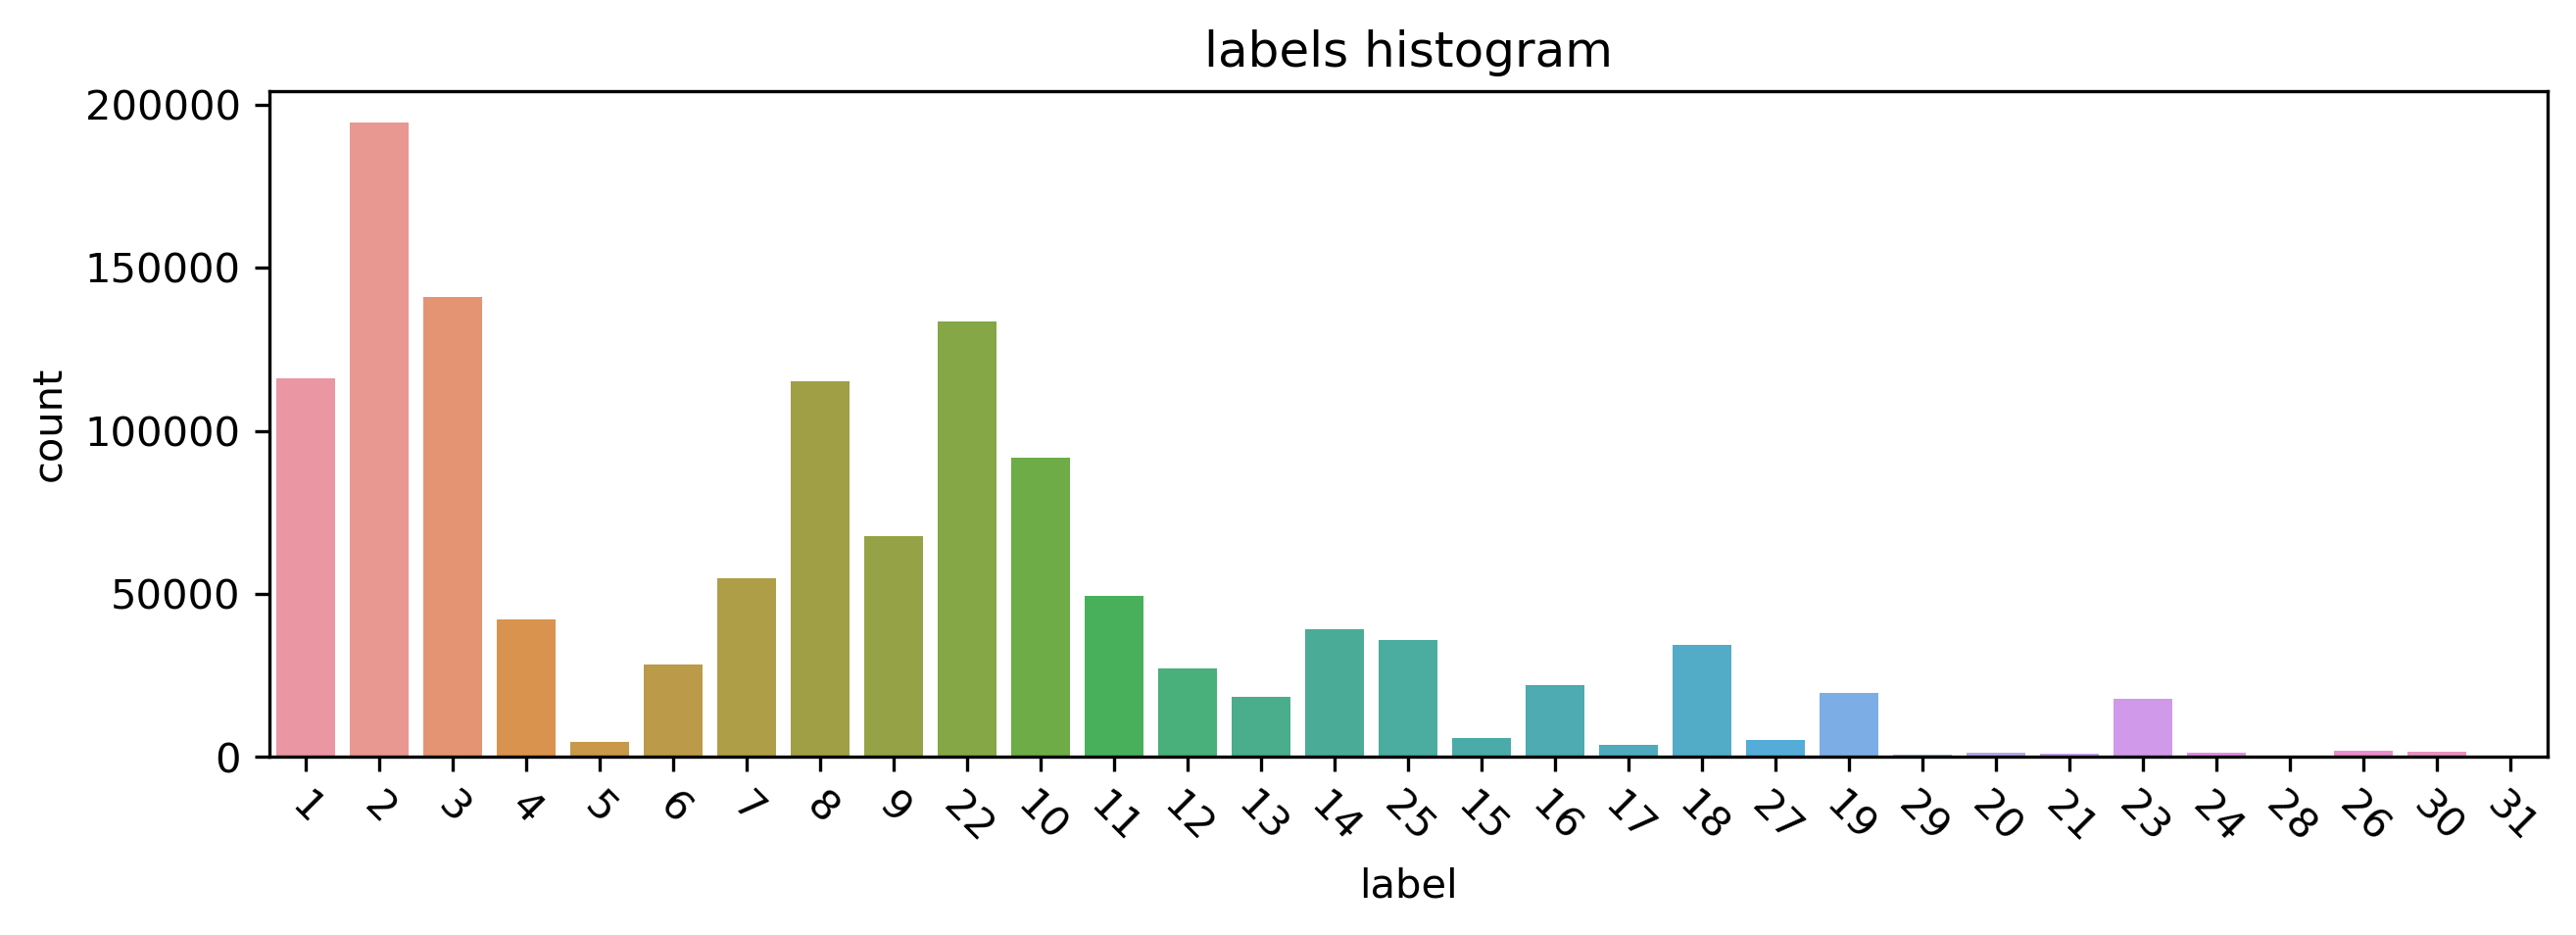

In [8]:
fig, ax = plt.subplots(figsize=(10,3), dpi=300)
sns.countplot(data=df[['label']], x='label', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation = -45)
ax.set_title('labels histogram')

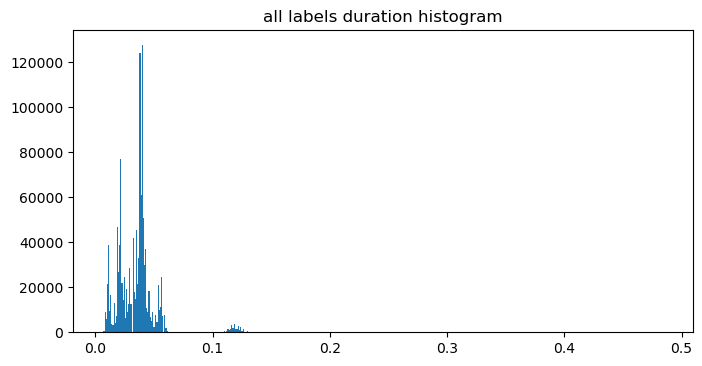

In [9]:
fig, _= plt.subplots(figsize=(8,4),dpi=100)
plt.hist(df[['duration']],bins = 500)
plt.title('all labels duration histogram')
plt.show()

Text(0.5, 1.0, 'violin plot of duration for each label')

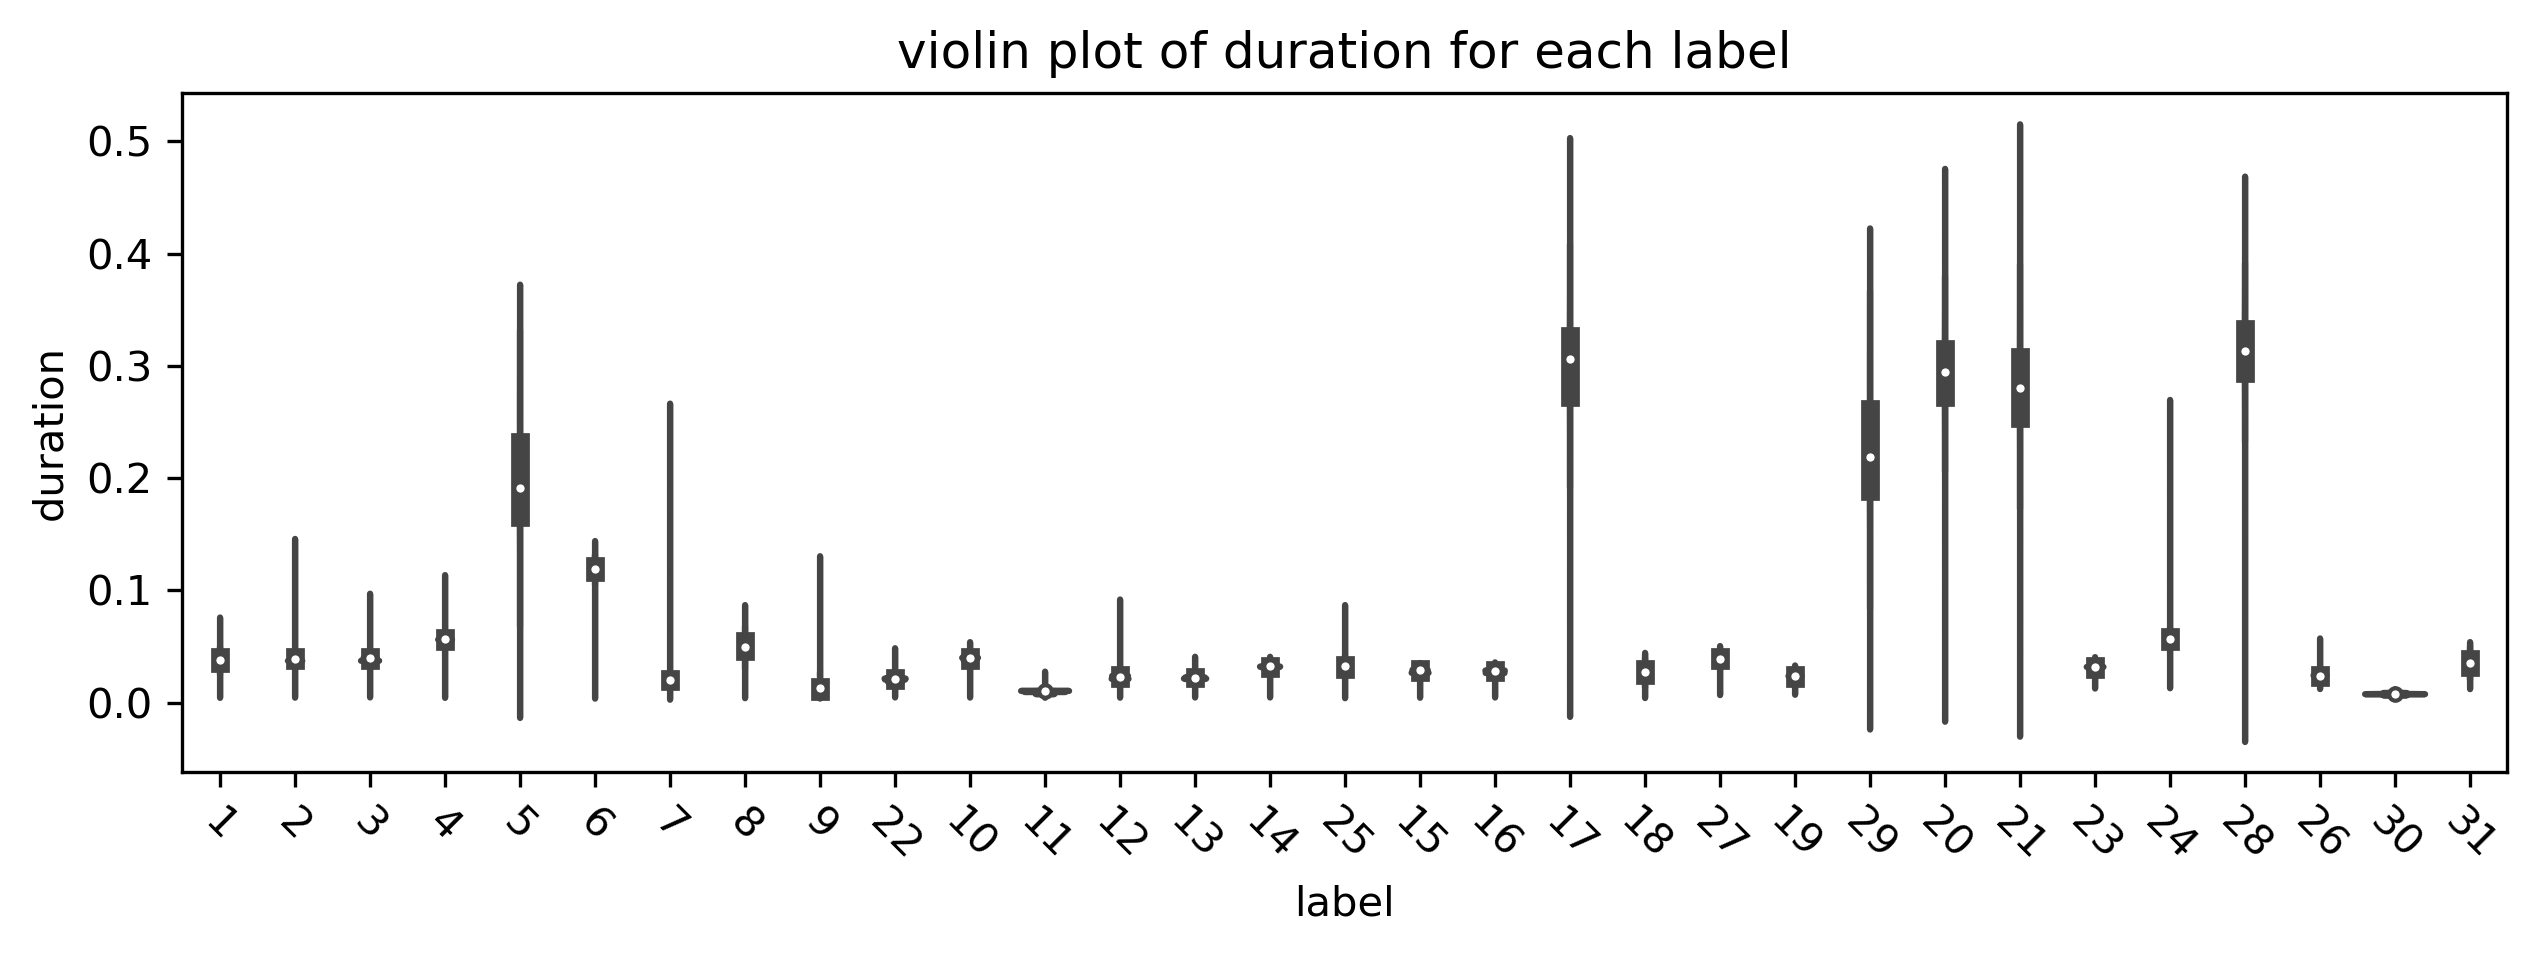

In [10]:
fig, ax = plt.subplots(figsize=(10,3), dpi=300)
sns.violinplot(x ="label",y ="duration",data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = -45)
ax.set_title('violin plot of duration for each label')

In [11]:
more_data_path = r'C:\Users\Sivan\Desktop\MSc\Cohen Lab\Data\HandAnnotation_part1_lb4483_Vika.mat'

In [12]:
new_df = create_syl_df_from_annot_file(more_data_path)

In [13]:
new_df.head()

,path,label,duration,start,end,time_from_prev
0,lb4483_00001_2019_05_23_12_17_00.wav,3,0.040907,3.966485,4.007392,NaN
1,lb4483_00001_2019_05_23_12_17_00.wav,3,0.025941,4.048299,4.074240,0.040907
2,lb4483_00001_2019_05_23_12_17_00.wav,3,0.025941,4.121134,4.147075,0.046893
3,lb4483_00001_2019_05_23_12_17_00.wav,3,0.028934,4.192971,4.221905,0.045896
4,lb4483_00001_2019_05_23_12_17_00.wav,3,0.031927,4.265805,4.297732,0.043900


Text(0.5, 1.0, 'labels histogram')

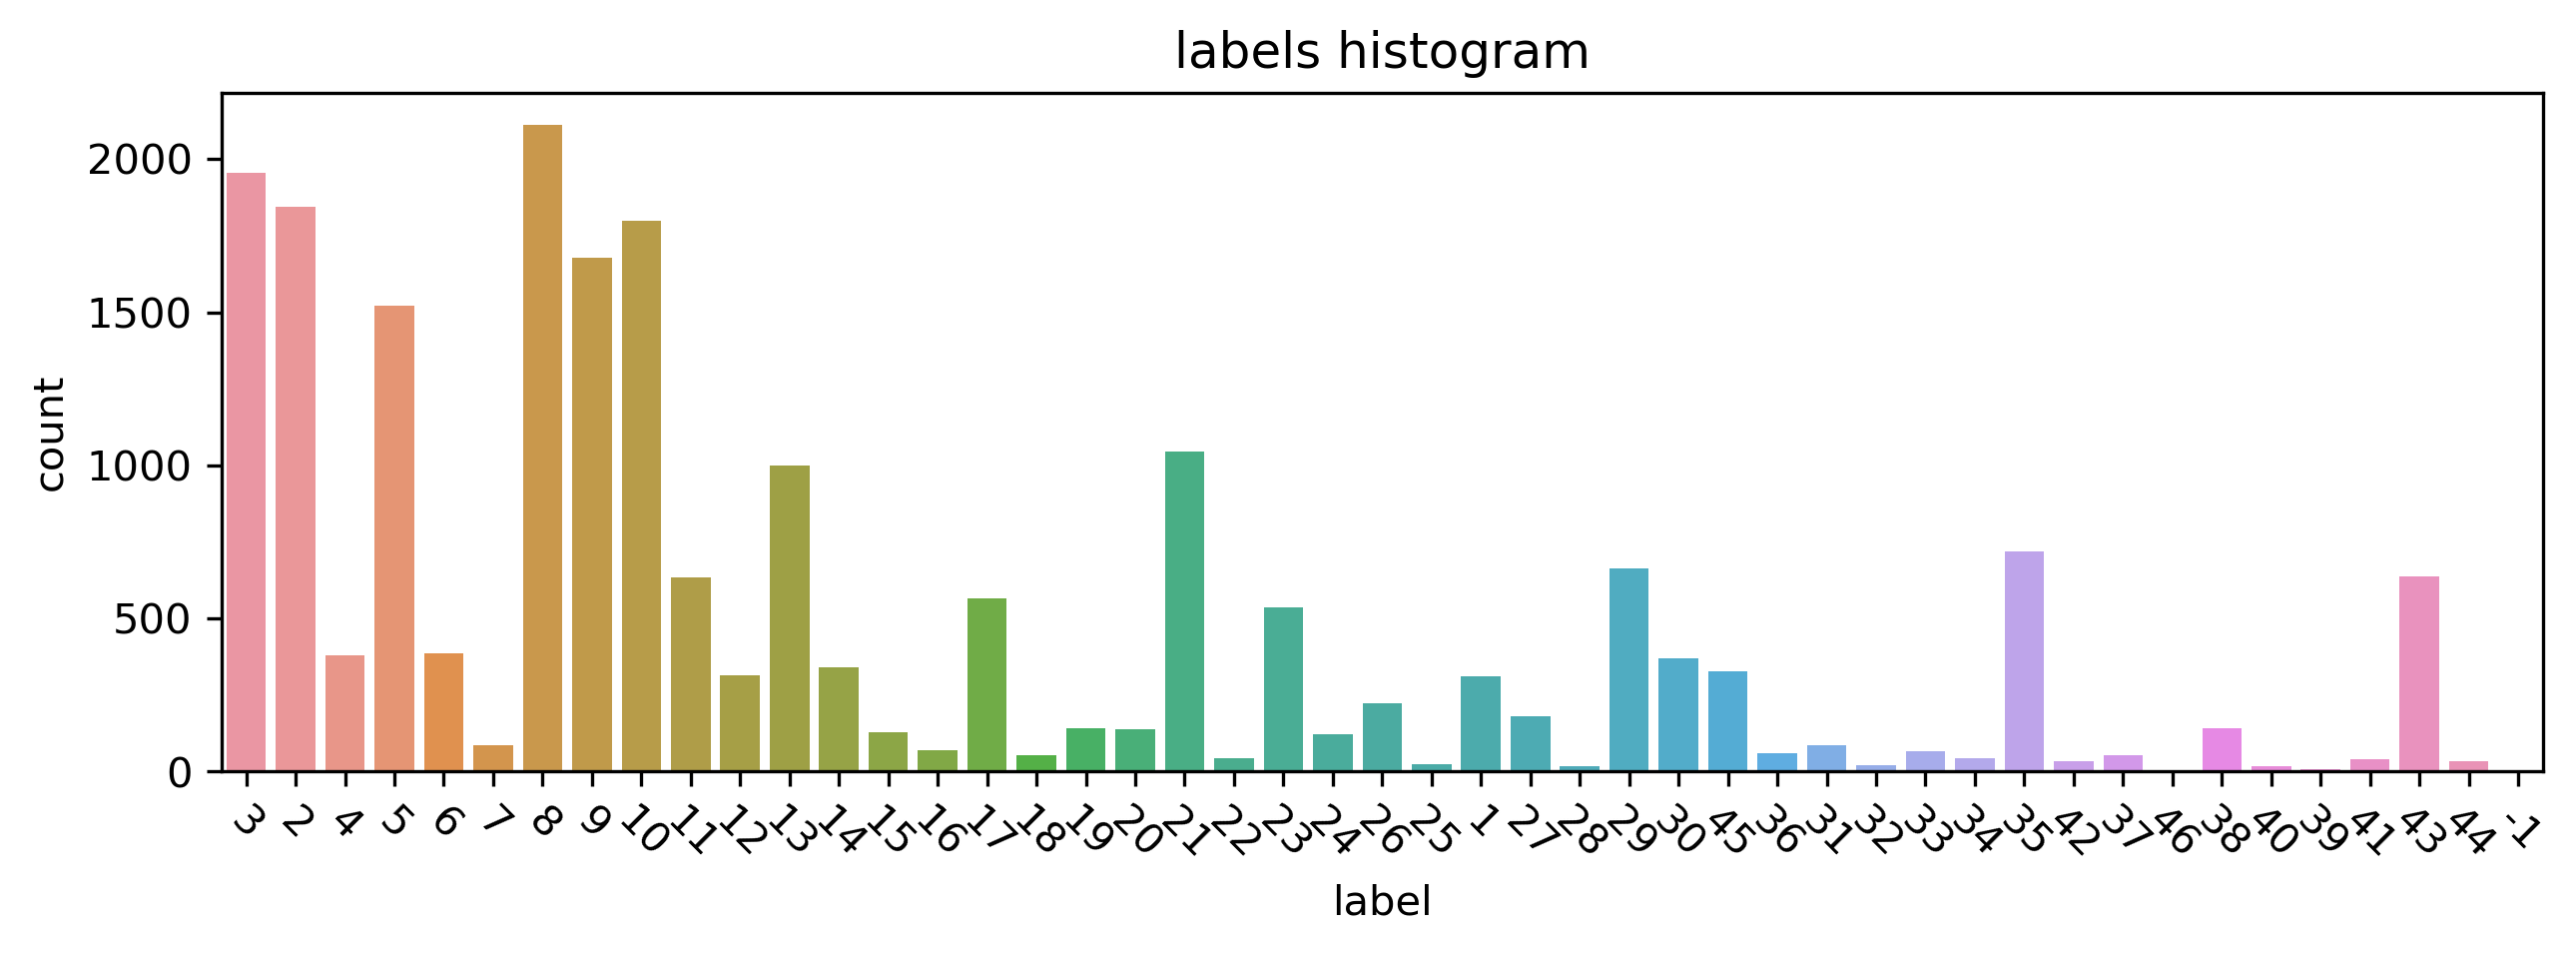

In [14]:
fig, ax = plt.subplots(figsize=(10,3), dpi=300)
sns.countplot(data=new_df[['label']], x='label', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation = -45)
ax.set_title('labels histogram')

### extracting songs

what does the function that converts annotations to strings of songs needs to do (according to the MATLAB code):
* being able to say that 2 or more syllabels are the same and treat them as such in the creation of the strings
* define phrases (same syllables with certain time aloud between them)
* define songs (a concatination of phrases with some time aloud between them)
* also maybe want to set syllabels to ignore? how to ignore them? just skip and start new songs if they are between syllabels that we are interested in?
* during the run of the function we want to save the dates from which each of the songs were recorded - maybe want to create a class or maybe a dict will be ebough?



In [59]:
df = create_syl_df_from_annot_file(data_path)

In [60]:
df.tail()

,path,label,duration,start,end,time_from_prev
1278386,lb4444_03928_2019_06_09_16_35_48.wav,26,0.025941,14.302993,14.328934,0.017959
1278387,lb4444_03928_2019_06_09_16_35_48.wav,26,0.026939,14.343900,14.370839,0.014966
1278388,lb4444_03928_2019_06_09_16_35_48.wav,26,0.025941,14.384807,14.410748,0.013968
1278389,lb4444_03928_2019_06_09_16_35_48.wav,26,0.022948,14.429705,14.452653,0.018957
1278390,lb4444_03928_2019_06_09_16_35_48.wav,26,0.016961,14.471610,14.488571,0.018957


In [17]:
exaple_str = 'lb4444_00001_2019_05_21_10_52_58.wav'

In [31]:
DATE_REGEX =  r'\d{4}_\d{2}_\d{2}_\d{2}_\d{2}_\d{2}'
date_extracted = re.search(DATE_REGEX,exaple_str).group()
#if want to get date and time in datetime format can use the following:
# datetime.strptime(date_extracted, '%Y_%m_%d_%H_%M_%S').time()

FILE_NUM_REGEX =  r'\d{5}'
file_num_extracted = re.search(FILE_NUM_REGEX,exaple_str).group()
file_num = int(file_num_extracted)

In [61]:
df['datetime'] = df['path'].str.extract(r'(\d{4}_\d{2}_\d{2}_\d{2}_\d{2}_\d{2})')

In [62]:
df['file_num'] = df['path'].str.extract(r'(\d{5})')

In [44]:
ALPHAN_NUMERIC = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz';

In [63]:
df['string_label'] = df['label'].apply(lambda x: ALPHAN_NUMERIC[int(x)-1])

In [64]:
df.head()

,path,label,duration,start,end,time_from_prev,datetime,file_num,string_label
0,lb4444_00001_2019_05_21_10_52_58.wav,1,0.037778,0.026984,0.064762,NaN,2019_05_21_10_52_58,00001,A
1,lb4444_00001_2019_05_21_10_52_58.wav,1,0.040476,0.097143,0.137619,0.032381,2019_05_21_10_52_58,00001,A
2,lb4444_00001_2019_05_21_10_52_58.wav,1,0.037778,0.170000,0.207778,0.032381,2019_05_21_10_52_58,00001,A
3,lb4444_00001_2019_05_21_10_52_58.wav,1,0.040476,0.242857,0.283333,0.035079,2019_05_21_10_52_58,00001,A
4,lb4444_00001_2019_05_21_10_52_58.wav,1,0.037778,0.315714,0.353492,0.032381,2019_05_21_10_52_58,00001,A


In [70]:
unique_file_nums = np.unique(df['file_num'])

In [98]:
# first find splits between phrases, than check if these are suppoused to be different songs
# currently using the default values in convert_to_pst will be avilable as param in the final function
# need to ignore the first idx that is found because it's the Nan at the beginning of calculation for each file - 
# - maybe the proper thing to do is to set it to zreo?

In [91]:
np.where((df[df['file_num'] == unique_file_nums[0]]['time_from_prev']<0.25).astype(int)==0)

(array([ 0, 45], dtype=int64),)

In [95]:
curr_file_string = "".join(df[df['file_num'] == unique_file_nums[0]]['string_label'].astype(str).array)

In [ ]:
# now want to check the numebr of syllables in this part if there is more than 1 than need to extract according to order

In [103]:
len(set(curr_file_string[:45]))

1

In [97]:
curr_file_string[45:]

'BBBBBBBBBBBBBBBBBBBBBBBBBBBBCCCCCCCCCCCCCCCCCCCCCCDDDDDDDDDDDDDDDDDEFFFFFFFFFFFFF'